LINEAR REGRESSION:  

Y = wX + b

Y -> Dependent Variable
X -> Independent Variable
w -> Weight
b -> bias
   
GRADIENT DECENT:  

optimization algorithm to minimize loss function.  
w = w - a*dw   
b = b - a*db

LEARNING RATE:

tunes the step at each iteration to attain global minimum.

w , b => Model Parameter  
learning rate, no.of iterations => Hyper-Parameter

WORK FLOW:
1. set learning rate & iterations. initiate w & b.

2. build linear regression ( Y = wX + b).

3. find y_pred value for given x with corresponding w & b.

4. check the loss function.

5. update params using gradient descent (new weight & bias).

6. step 3,4,5 are repeated untill global minimum is reached.

Finally we get the best model as it has minimum loss function.

In [18]:
# importing numpy library
import numpy as np

Linear regression model

In [28]:
class Linear_Regression():

  # initiating the hyper-parameters (learningrate & iterations)
  # self => instance of the model

  def __init__(self,learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  # fit function to train the model

  def fit(self, X, Y):
    #no.of training examples(m-rows) & no.of features(n-cols)
    self.m, self.n = X.shape

    #initiating weight & bias of the model
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    #implementing gardient descent for optimization
    for i in range (self.no_of_iterations):
      self.update_weights()


  def update_weights(self):
    Y_prediction = self.predict(self.X)

    # calculate the gradients
    dw = -(2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = -2 * np.sum(self.Y - Y_prediction) / self.m

    # updating the weights
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  # line function for prediction
  def predict(self,X):
    return X.dot(self.w) + self.b

Using linear regression model for prediction

In [20]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Data pre processing

In [21]:
# loading dataset from csv file to pandas dataframe
salary_data = pd.read_csv('/content/salary_data.csv')

In [22]:
# printing first 5 rows
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [23]:
#printing last 5 rows
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [24]:
# finding no.of rows & cols
salary_data.shape

(30, 2)

In [25]:
# check for missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [26]:
# seperating the feature & target
X = salary_data.iloc[:,:-1].values # removes last col
Y = salary_data.iloc[:,1].values # stores col 1
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [27]:
# splitting the dataset into training & test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=2)

Training the linear regression model

In [59]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)

In [60]:
model.fit(X_train,Y_train)

In [61]:
 # printing the parameter values ( weights & bias)
 print(' weight : ', model.w[0])
 print(' Bias : ', model.b)

 weight :  9514.400999035135
 Bias :  23697.406507136307


The trained model equation is :-  
Y = 9514(X) + 23697

Predict the salary value for test data

In [62]:
test_data_prediction = model.predict(X_test)


In [63]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


visualizing the predicted values & actual values

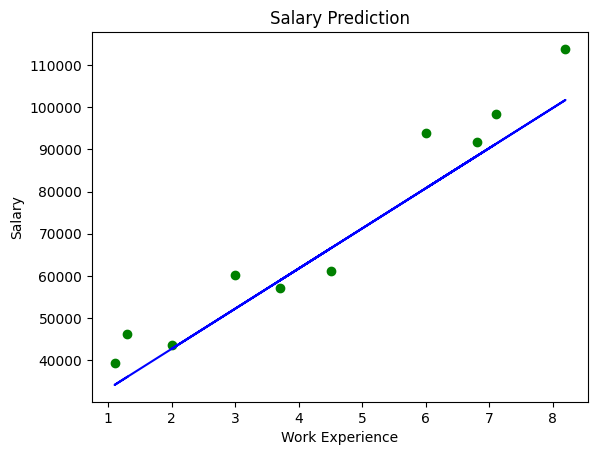

In [64]:
plt.scatter(X_test, Y_test, color='green')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()